# Fig 3

# Stage 1 Analysis
#### Partial rank correlation coefficient analysis (PRCC) - regression based analysis code

### Step 1: Input preparation 

In [1]:
#####NIMML######
### Author: Meghna Verma
### Date : August 10, 2017

#Set it to the directory that has all the csv files obatined after converting the tsv file outptus from hybrid computer model

path <- "/Volumes/Computer Backup/NIMML/Project_NameENISIMSM/data/Fig3-data/HP_LP"
setwd(path)

In [2]:
getwd()

[1] "/Volumes/Computer Backup/NIMML/Project_NameENISIMSM/data/Fig3-data/HP_LP"

In [3]:
library("qpcR")

## Reading all csv files ##
temp = list.files(pattern="*.csv")

LP_HP = read.csv(temp[1], header = FALSE)
LP_HP = LP_HP[,2];

for (i in 2:length(temp))
{
  file_one <- read.csv(temp[i],header = FALSE)
  file_one <- file_one[,2]
  
  # This pads NA to the rows that are shorter than rest #
  LP_HP <- qpcR:::cbind.na(LP_HP, file_one)
}

df_LP_HP <- data.frame(LP_HP)


Loading required package: MASS
Warning message:
“package ‘MASS’ was built under R version 3.3.2”Loading required package: minpack.lm
Warning message:
“package ‘minpack.lm’ was built under R version 3.3.2”Loading required package: rgl
Warning message:
“package ‘rgl’ was built under R version 3.3.2”Loading required package: robustbase
Warning message:
“package ‘robustbase’ was built under R version 3.3.2”Loading required package: Matrix
Warning message:
“package ‘Matrix’ was built under R version 3.3.2”

In [4]:
write.csv(df_LP_HP, "/Volumes/Computer Backup/NIMML/Project_NameENISIMSM/data/Fig3-data/HP_LP/New/HP_LP_input.csv")

### Clustering 

In [5]:
## Cmeans clustering ##
library(e1071)

input_tobeclustered2 <- read.csv("/Volumes/Computer Backup/NIMML/Project_NameENISIMSM/data/Fig3-data/HP_LP/New/HP_LP_input.csv", sep=",", header = TRUE)
input_tobeclustered2 <- input_tobeclustered2[,-1] 
input_tobeclustered <- t(input_tobeclustered2)
transposed <- input_tobeclustered

transposed[is.na(transposed)] <- 0

clustered_data<-cmeans(transposed, 3, iter.max = 100, verbose = FALSE, dist = "euclidean",
                       method = "cmeans", m = 2, rate.par = NULL, weights = 1)

write.csv(clustered_data$cluster, "/Volumes/Computer Backup/NIMML/Project_NameENISIMSM/data/Fig3-data/HP_LP/New/HP_LP_clusters_numbers.csv")
write.csv(clustered_data$membership, "/Volumes/Computer Backup/NIMML/Project_NameENISIMSM/data/Fig3-data/HP_LP/New/HP_LPclusters.csv")

Warning message:
“package ‘e1071’ was built under R version 3.3.2”

### Raw data

#### Input file: 
1. Cluster csv (number) 'likelihood' file obtained from the above clustering code
2. Parameter design file
3. All .csv files with avg values
4. Corresponding cells file 

#### Output file: 
1. Csv files that are clustered in different sets
   


In [6]:
# Create empty variables to be filled up
cluster1 = vector(); 
cluster2 = vector();
cluster3 = vector();
 
#install.packages("readr")
library(readr)

dataset <- read_csv("/Volumes/Computer Backup/NIMML/Project_NameENISIMSM/data/Fig3-data/HP_LP/New/HP_LP_clusters_numbers.csv",col_types = cols(X1 = col_character()))

Parameters<- read_csv("/Volumes/Computer Backup/NIMML/Project_NameENISIMSM/data/Fig3-data/Parameters.csv", col_names = FALSE)

# 
sorted <- dataset[with(dataset, order(x)),]
# 
index <- sort.int(dataset$x, index.return = TRUE)
# 
for (i in 1:152)
{
   if (sorted$x[i] == 1)
   {
     cluster1 <- rbind (cluster1,index$ix[i])
   }
   else if (sorted$x[i] == 2)
   {
     cluster2 <- rbind (cluster2,index$ix[i])
   }
   else
   {
     cluster3 <- rbind (cluster3,index$ix[i])
   }
 }

# # Make vectors of names of csv files that correspond to the clustered sets.
 cluster1_files <- vector()
 cluster2_files <- vector()
 cluster3_files <- vector()
# 
para1_files <- vector()
para2_files <- vector()
para3_files <- vector()
 
temp = list.files(pattern="*.csv")

Corresponding_cells <- read.csv("/Volumes/Computer Backup/NIMML/Project_NameENISIMSM/data/Fig3-data/Correponding_cells.csv")

SAMPLE1 <- Corresponding_cells
sorted_matlab <- sort.int(SAMPLE1$MATLAB, index.return = TRUE)

for (j in 1:length(cluster1))
 {

   cluster1_files <- rbind (cluster1_files, temp[cluster1[j]])
   para1_files <- rbind(para1_files, Parameters[sorted_matlab$ix[cluster1[j]],])
 }
for (k in 1:length(cluster2))
 {
 
  cluster2_files <- rbind (cluster2_files, temp[cluster2[k]])
   para2_files <- rbind(para2_files, Parameters[sorted_matlab$ix[cluster2[k]],])
 }
 
for (l in 1:length(cluster3))
 {

   cluster3_files <- rbind (cluster3_files, temp[cluster3[l]])
   para3_files <- rbind(para3_files, Parameters[sorted_matlab$ix[cluster3[l]],]) 
}


Warning message:
“package ‘readr’ was built under R version 3.3.2”Warning message:
“Missing column names filled in: 'X1' [1]”Parsed with column specification:
cols(
  .default = col_double(),
  X1 = col_integer()
)
See spec(...) for full column specifications.


### Step 2 : Preparing the dataset for partial rank correlation coefficient analyses (PRCC)

In [8]:

para1_patterns <- para1_files
para2_patterns <- para2_files
para3_patterns <- para3_files

###Cluster 1 mean
polmean1 <- rep(0,length(cluster1_files))
 for(i in 1:length(cluster1_files)){
   data_my1 <- read.csv(cluster1_files[i],header=FALSE)
   data_my1 <- data_my1[,2]
   polmean1[i] <- mean(data_my1)
 }
###Cluster 2 mean
 polmean2 <- rep(0,length(cluster2_files))
 for(i in 1:length(cluster2_files)){
   data_my2 <- read.csv(cluster2_files[i],header=FALSE)
   data_my2 <- data_my2[,2]
   polmean2[i] <- mean(data_my2)
 }
# 
###Cluster 3 mean
 polmean3 <- rep(0,length(cluster3_files))
 for(i in 1:length(cluster3_files))
   {
   data_my3 <- read.csv(cluster3_files[i],header=FALSE)
   data_my3 <- data_my3[,2]
   polmean3[i] <- mean(data_my3)
 }
# 
 para1_files$mean <- polmean1
 para2_files$mean <- polmean2
 para3_files$mean <- polmean3
# 
 x <- data.frame(para1_files)
 y <- data.frame(para2_files)
 z <- data.frame(para3_files)
# 
 indexes_info <- rbind(cluster1, cluster2, cluster3)
# 
 final <- rbind(x,y,z)
 
 #write.csv(final, file = '/Users/meghnaverma/Documents/MATLAB/NIMML/Round2_SA/ENISI_Avg/Mres_LP/Mres/Mres_LP_means.csv', row.names = FALSE)
 write.csv(final, file = '/Volumes/Computer Backup/NIMML/Project_NameENISIMSM/data/Fig3-data//HP_LP/HP_LP_means.csv', row.names = FALSE)


### Code for PRCC 

In [10]:
data_LP_HP_main <- read.csv('/Volumes/Computer Backup/NIMML/Project_NameENISIMSM/data/Fig3-data/HP_LP/HP_LP_means.csv', header = TRUE)
#data_LP_Mres_main <- <- read.csv('/Users/meghnaverma/Documents/MATLAB/NIMML/Round2_SA_Xi/ENISI_Avg/Mres_LP/New/Mres_LP_means.csv', header = TRUE)

In [11]:
sorted_data_LPHP <- data_LP_HP_main[order(data_LP_HP_main$X1),] 
#sorted_data_LPMres <- data_LP_HP_main[order(data_LP_Mres_main$X1),]

In [12]:
data_LP_HP <- data.frame(sorted_data_LPHP[,-1])
data_LP_HP <- data.frame(data_LP_HP[,-39])
#data_LP_Mres <- data.frame(sorted_data_LPMres[,-1])
#data_LP_Mres <- data.frame(data_LP_Mres[,-39])

In [13]:
scaled.dat_HP <- scale(data_LP_HP)
colMeans(scaled.dat_HP)
apply(scaled.dat_HP, 2, sd);

X2            X3            X4            X5            X6 
 5.682361e-17  2.657665e-16  1.266576e-16 -3.177283e-17 -1.707561e-16 
           X7            X8            X9           X10           X11 
-7.502394e-17  4.964505e-18 -1.324553e-16  6.639882e-17 -1.542763e-16 
          X12           X13           X14           X15           X16 
-1.440263e-16 -7.301246e-17  1.142578e-16  1.372600e-16  2.670561e-17 
          X17           X18           X19           X20           X21 
 1.319217e-16  1.674236e-16  1.839320e-16  2.570044e-16  1.820547e-16 
          X22           X23           X24           X25           X26 
-3.624944e-17  1.992649e-16 -1.207402e-16 -8.268468e-18  1.222524e-16 
          X27           X28           X29           X30           X31 
 3.782724e-17  4.009836e-17  9.485342e-17  9.812600e-17 -9.822872e-17 
          X32           X33           X34           X35           X36 
 6.025882e-18 -2.156992e-18  1.847138e-17 -7.335484e-17 -4.964505e-18 
          X37           X38           X39 
 1.209142e-16  1.807764e-17  9.451390e-17

X2  X3  X4  X5  X6  X7  X8  X9 X10 X11 X12 X13 X14 X15 X16 X17 X18 X19 X20 X21 
  1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1 
X22 X23 X24 X25 X26 X27 X28 X29 X30 X31 X32 X33 X34 X35 X36 X37 X38 X39 
  1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1

In [14]:
total_data_HP <- data.frame(cbind(scaled.dat_HP, sorted_data_LPHP[,40]))

In [15]:
library("sensitivity")

In [16]:
coeff_pcc_HPLP <- pcc(total_data_HP[,1:38], total_data_HP[,39], nboot = 500, rank = TRUE, conf = 0.95)

In [17]:
library(epiR)
coeff_prcc_pHPLP <- epi.prcc(total_data_HP, sided.test = 2)


Loading required package: survival
Warning message:
“package ‘survival’ was built under R version 3.3.2”
Attaching package: ‘survival’

The following object is masked from ‘package:robustbase’:

    heart

Package epiR 0.9-96 is loaded
Type help(epi.about) for summary information




### Saving the files obtained from PRCC and epi.prcc as Cellpopulation_prcc.csv and Cellpopulation_p.csv

In [18]:
write.csv(coeff_pcc_HPLP$PRCC, "/Volumes/Computer Backup/NIMML/Project_NameENISIMSM/data/Fig3-data/HP_LP/HPLP_prcc.csv")
write.csv(coeff_prcc_pHPLP, "/Volumes/Computer Backup/NIMML/Project_NameENISIMSM/data/Fig3-data/HP_LP/HPLP_p.csv")

### Conduct similar analysis for Mres outut cell population. 
We conducted the above analysis for Mres_LP (resident macrophages in Lamina propria) and saved the results obatined from pcc and epi.prcc in Mres_prcc.csv and Mres_p.csv respectively. 

### Reading the Mres_LP files in the workspace.

In [19]:
coeff_pcc_Mres <- read.csv("/Volumes/Computer Backup/NIMML/Project_NameENISIMSM/data/Fig3-data/Mres_prcc.csv")
p_values_Mres <- read.csv("/Volumes/Computer Backup/NIMML/Project_NameENISIMSM/data/Fig3-data/Mres_p.csv")


In [20]:
cols_HPLP <- c("gray", "blue")[(coeff_prcc_pHPLP$p.value < 0.05)+1]
cols_MresLP <- c("gray", "blue")[(p_values_Mres$p.value < 0.05)+1]

## Plotting the bargaphs as shown in the paper

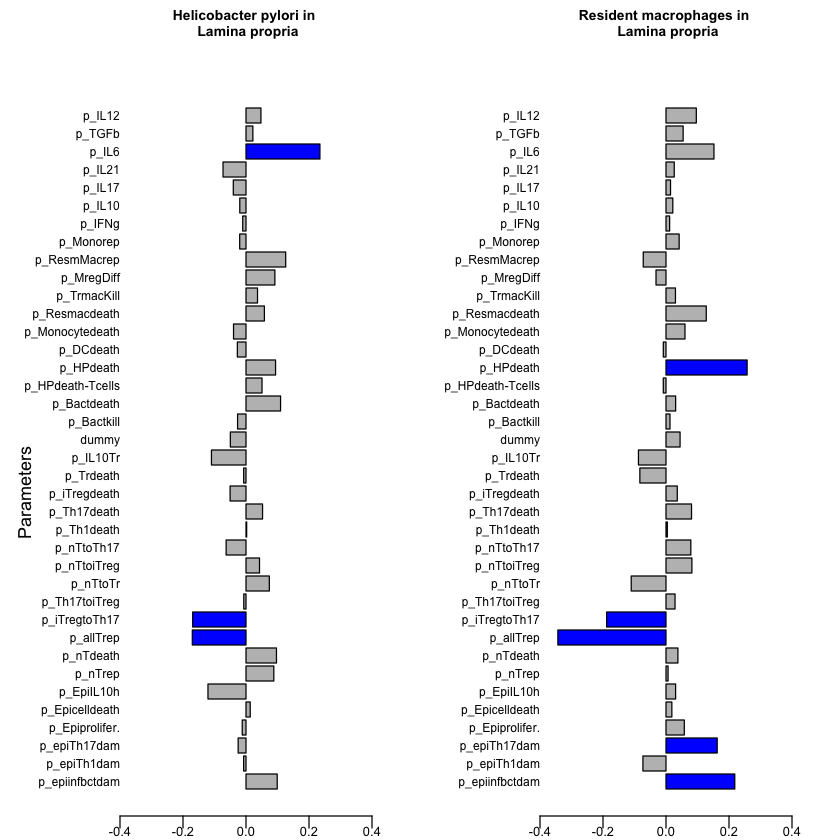

In [23]:
par(mar=c(1,5,7,2), las=1, mgp=c(3.5,0,0), mfrow=c(1,2)) 
label <- c("p_epiinfbctdam", "p_epiTh1dam", "p_epiTh17dam", "p_Epiprolifer.","p_Epicelldeath",
           "p_EpiIL10h","p_nTrep","p_nTdeath","p_allTrep","p_iTregtoTh17","p_Th17toiTreg","p_nTtoTr",
           "p_nTtoiTreg", "p_nTtoTh17","p_Th1death","p_Th17death","p_iTregdeath","p_Trdeath", 
           "p_IL10Tr","dummy","p_Bactkill","p_Bactdeath", "p_HPdeath-Tcells","p_HPdeath","p_DCdeath",
           "p_Monocytedeath","p_Resmacdeath","p_TrmacKill","p_MregDiff","p_ResmMacrep",
           "p_Monorep","p_IFNg","p_IL10","p_IL17","p_IL21","p_IL6","p_TGFb","p_IL12")
#
barplot(coeff_pcc_HPLP$PRCC$original, horiz=TRUE, col=cols_HPLP, names.arg = label, cex.names = 0.6,cex.lab = 0.9, cex.main = 0.65, cex.axis = 0.65,
        xlim = c(-0.4, 0.4), ylim = c(0,40), ylab = 'Parameters')
title("Helicobacter pylori in \n Lamina propria", line = 5.5, cex.main = 0.7)

barplot(coeff_pcc_Mres$original, horiz=TRUE, col=cols_MresLP, names.arg = label, cex.names = 0.6,cex.lab = 0.9, cex.main = 0.65, cex.axis = 0.65,
        xlim = c(-0.4, 0.4), ylim = c(0,40))
title("Resident macrophages in \n Lamina propria", line = 5.5, cex.main = 0.7)
